In [1]:
import pandas as pd 



In [18]:
data = pd.read_csv('../Data/Processed Dataset.csv')

#Select the numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the 'retweets' column from the list
numeric_cols.remove('retweets')


In [19]:
numeric_cols

['id',
 'hour of tweet',
 'Early Morning Count',
 'Morning Count',
 'Noon Count',
 'Eve Count',
 'Night Count',
 'Late Night Count',
 'user_followers',
 'Months Since Creation of Account',
 'Negative Score',
 'Neutral Score',
 'Positive Score',
 'Compound Score',
 'Photo Count',
 'Video Count',
 'GIF Count',
 'Polarity Score_textblob',
 'Subjectivity Score_textblob',
 'likes',
 'replies',
 'quoteCount',
 'tweet_length',
 'num_mentions',
 'num_hashtags',
 'num_urls']

# Correlations

In [5]:
correlations = data.corr()

correlations

,id,hour of tweet,Early Morning Count,Morning Count,Noon Count,Eve Count,Night Count,Late Night Count,user_followers,Months Since Creation of Account,...,Polarity Score_textblob,Subjectivity Score_textblob,likes,retweets,replies,quoteCount,tweet_length,num_mentions,num_hashtags,num_urls
id,1.000000,-0.253759,0.061149,0.116331,0.152714,0.110532,-0.235270,0.046670,-0.013142,-0.148714,...,0.000787,-0.025448,0.017055,0.003634,0.009528,0.000918,0.097798,-0.041937,0.194214,0.087453
hour of tweet,-0.253759,1.000000,-0.417535,-0.494807,-0.410004,-0.245513,0.825326,-0.456788,-0.009655,0.093524,...,-0.001274,0.018384,-0.004055,0.005049,-0.002600,0.001327,-0.047509,0.034711,-0.054373,-0.069099
Early Morning Count,0.061149,-0.417535,1.000000,-0.010873,-0.013314,-0.017718,-0.253963,-0.005896,0.006354,-0.008481,...,0.004280,-0.000533,-0.002546,-0.004058,-0.002468,-0.001807,0.004261,-0.000739,0.007841,0.016561
Morning Count,0.116331,-0.494807,-0.010873,1.000000,-0.020901,-0.027814,-0.398671,-0.009256,-0.003407,-0.026161,...,0.003062,-0.002421,0.002929,-0.000263,0.009585,0.003940,0.020841,-0.010670,-0.004431,0.028327
Noon Count,0.152714,-0.410004,-0.013314,-0.020901,1.000000,-0.034061,-0.488205,-0.011335,0.012225,-0.025685,...,0.003281,-0.001198,0.003706,-0.000293,0.000774,-0.000327,0.004777,-0.008195,-0.013313,0.021787
Eve Count,0.110532,-0.245513,-0.017718,-0.027814,-0.034061,1.000000,-0.649691,-0.015084,-0.005616,-0.033439,...,-0.002074,-0.002945,0.004614,-0.000458,0.000264,0.000487,0.027825,-0.016030,0.033352,0.031306
Night Count,-0.235270,0.825326,-0.253963,-0.398671,-0.488205,-0.649691,1.000000,-0.216205,-0.007775,0.051946,...,-0.002747,0.004200,-0.006720,0.001569,-0.004324,-0.001576,-0.031654,0.021361,-0.017043,-0.050632
Late Night Count,0.046670,-0.456788,-0.005896,-0.009256,-0.011335,-0.015084,-0.216205,1.000000,0.020568,-0.006998,...,-0.000337,-0.001434,0.004327,0.000623,0.001101,0.000869,-0.001054,-0.004913,0.003523,0.002849
user_followers,-0.013142,-0.009655,0.006354,-0.003407,0.012225,-0.005616,-0.007775,0.020568,1.000000,0.061406,...,-0.001894,-0.006556,0.045753,0.041596,0.031315,0.028176,-0.002240,-0.007338,-0.043174,0.006958
Months Since Creation of Account,-0.148714,0.093524,-0.008481,-0.026161,-0.025685,-0.033439,0.051946,-0.006998,0.061406,1.000000,...,0.014660,0.050164,-0.009847,-0.009272,-0.002185,-0.002317,-0.096138,0.081842,-0.208319,-0.188617


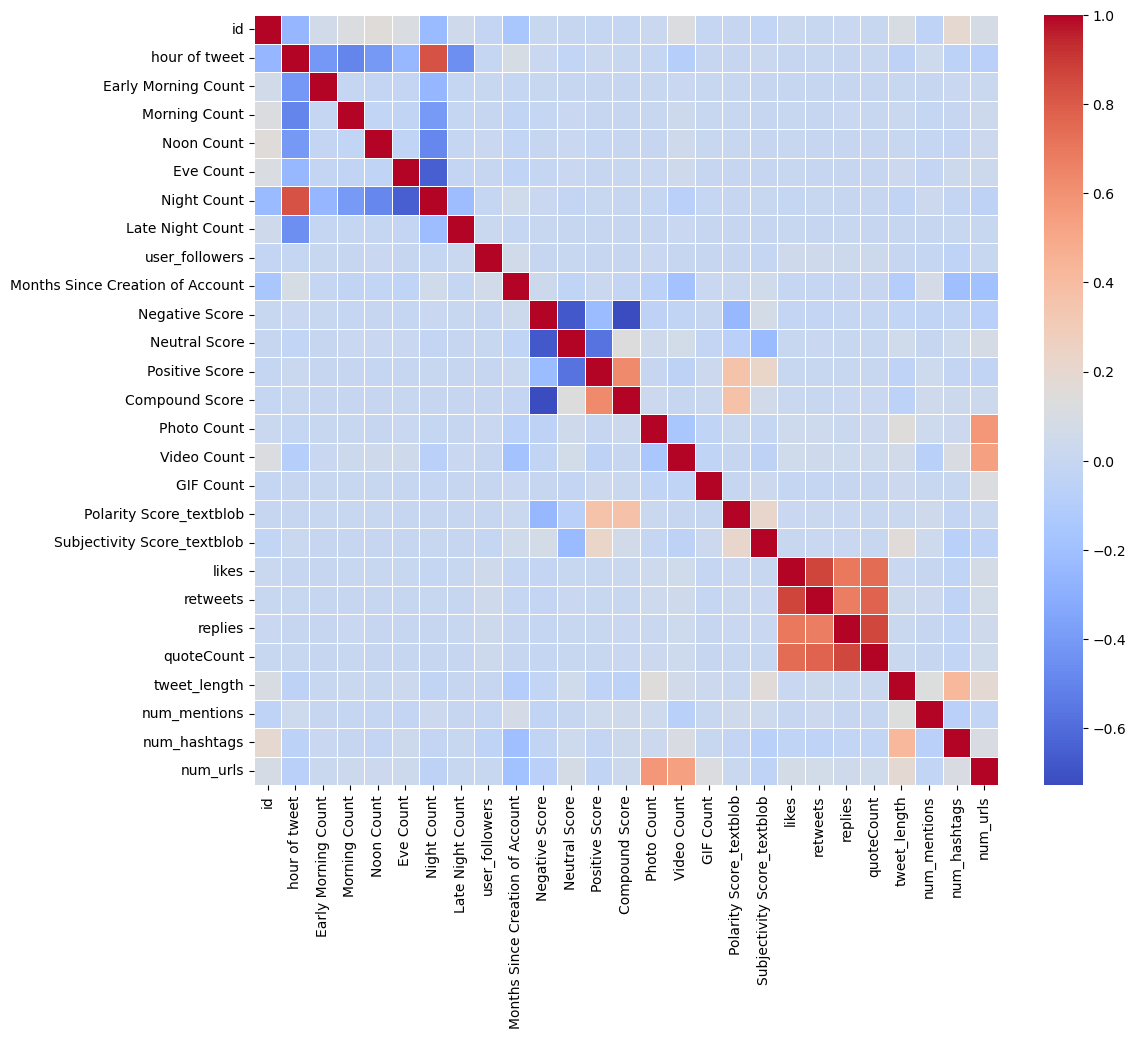

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=False, cmap='coolwarm', linewidths=.5)

plt.show()

# Scatterplots

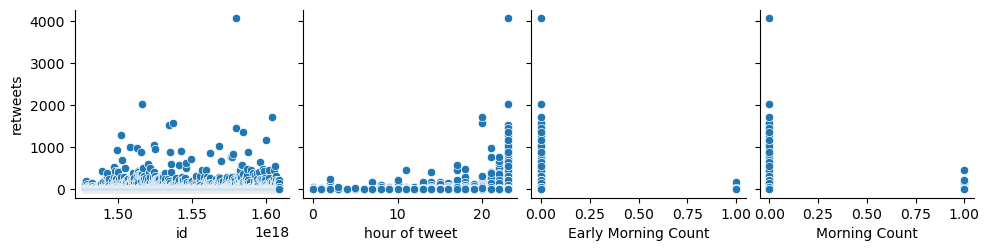

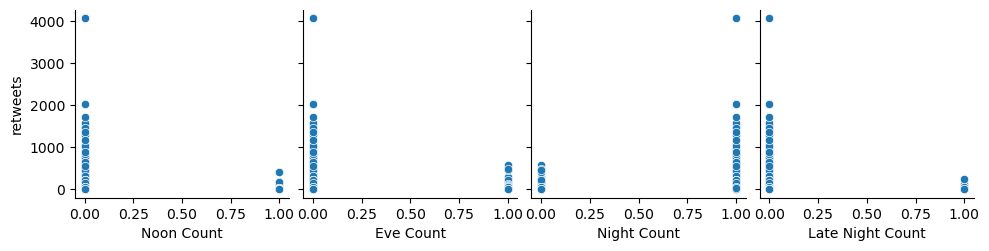

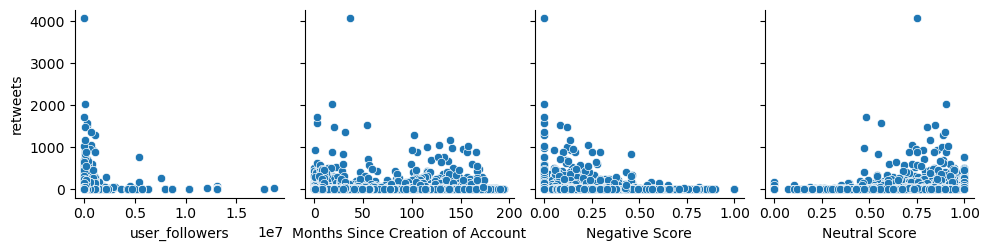

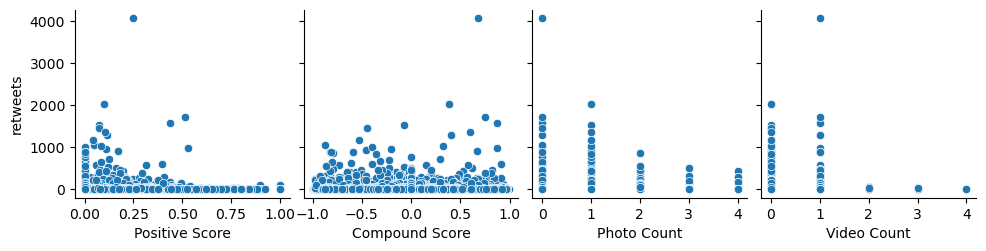

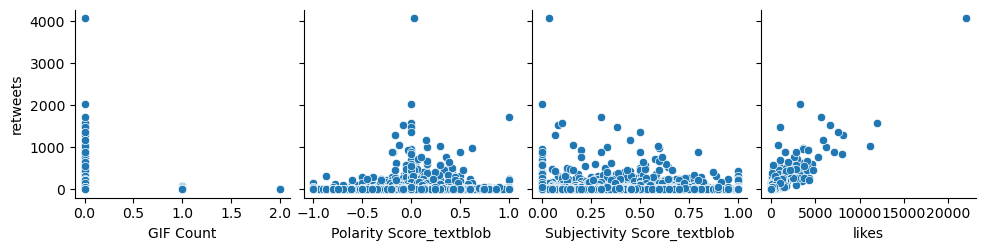

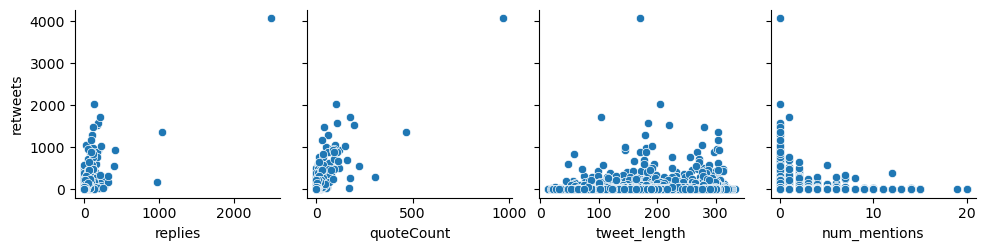

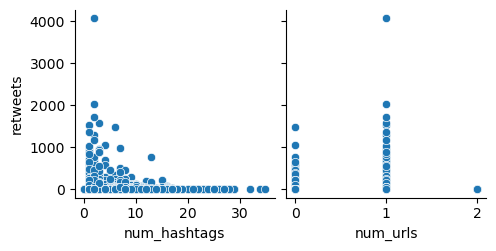

In [20]:
# Create the pairplots
for i in range(0, len(numeric_cols), 4):
    sns.pairplot(data=data, y_vars=['retweets'], x_vars=numeric_cols[i:i+4])

# Linear regressions

C:\Users\ekmho\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


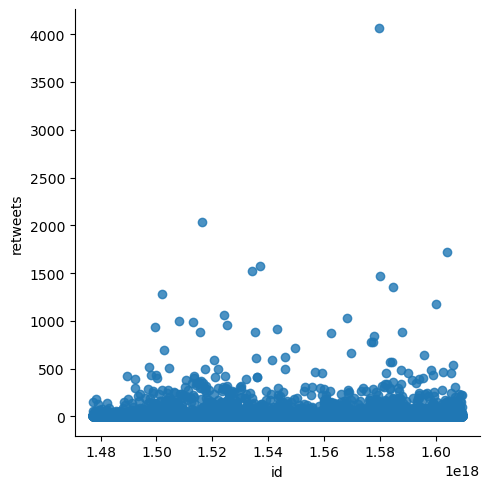

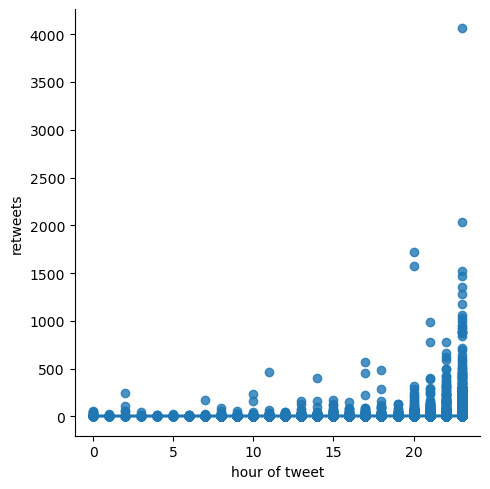

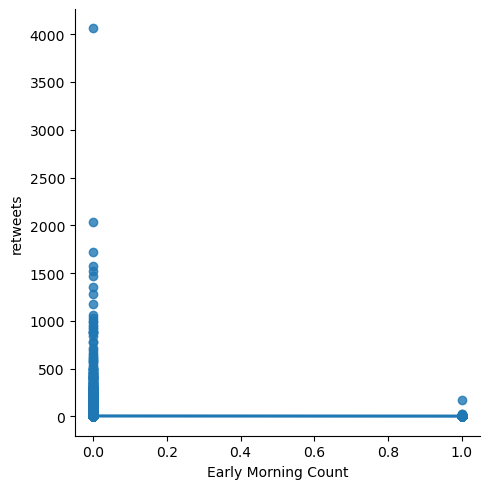

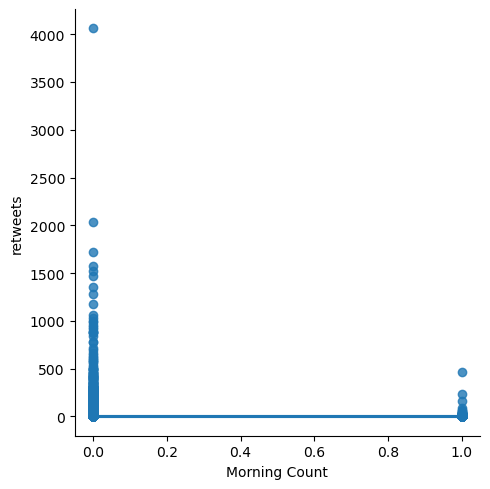

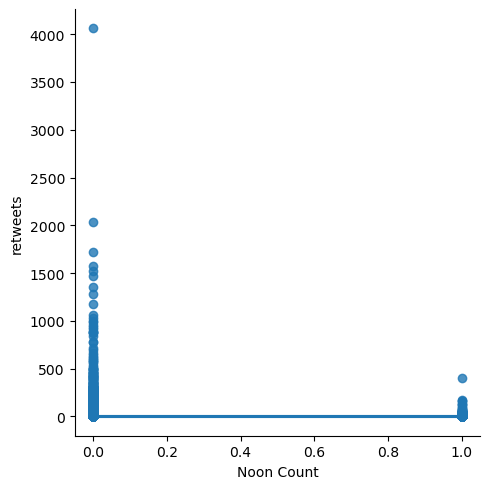

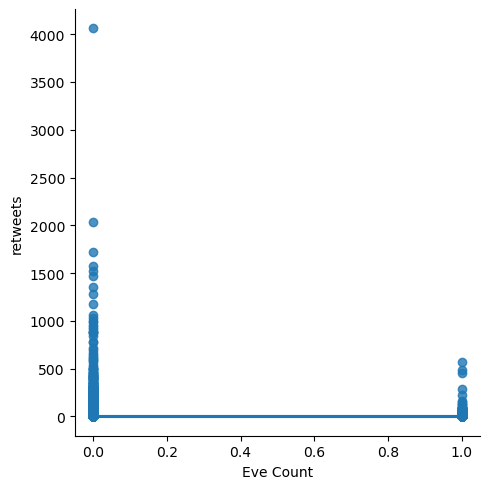

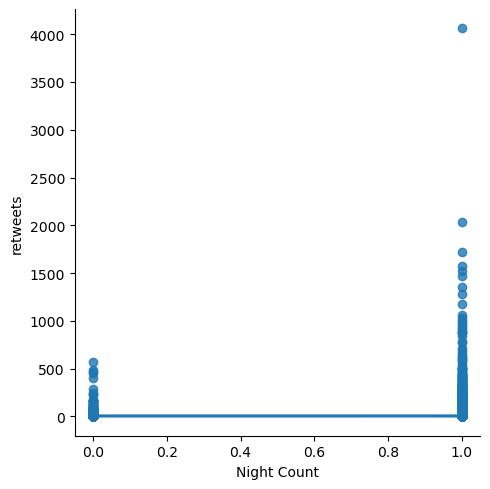

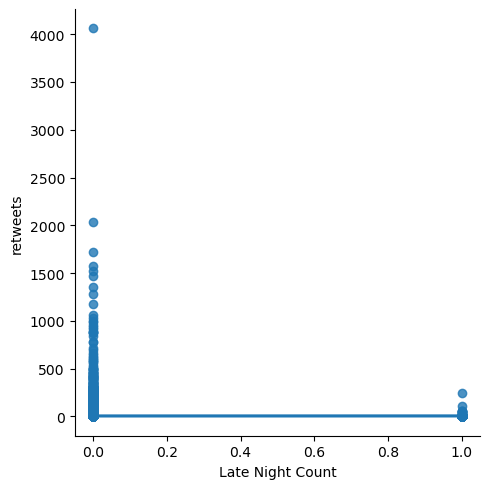

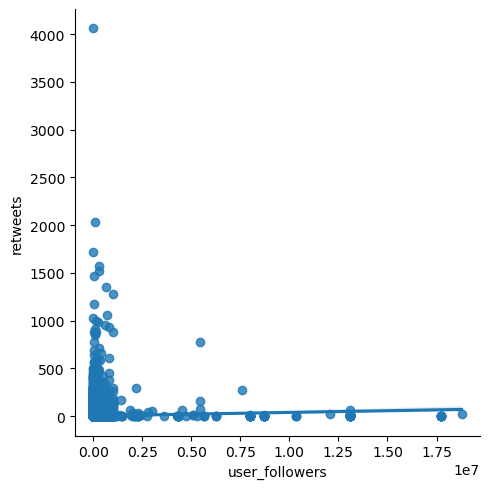

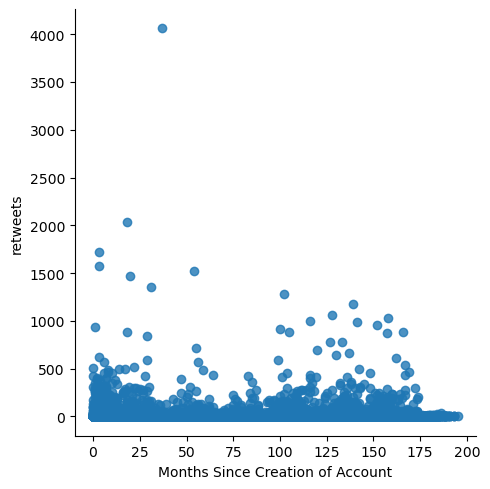

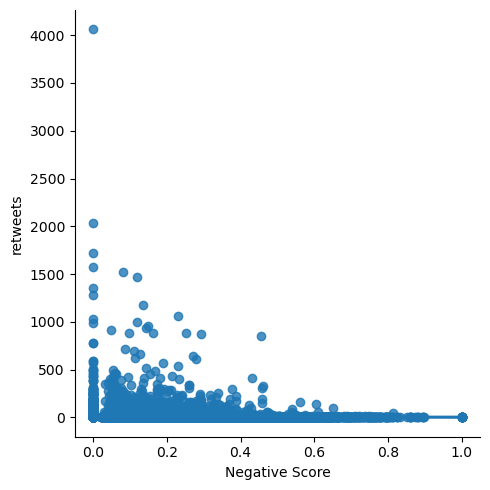

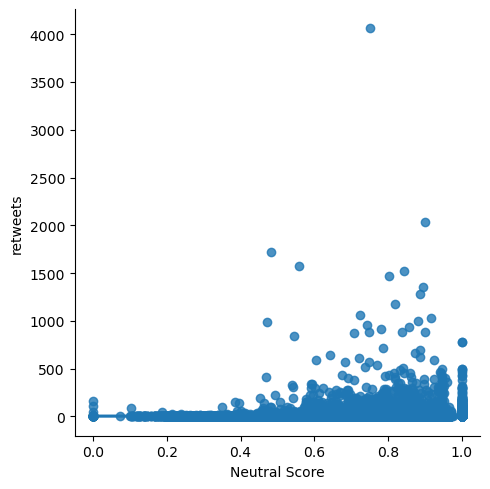

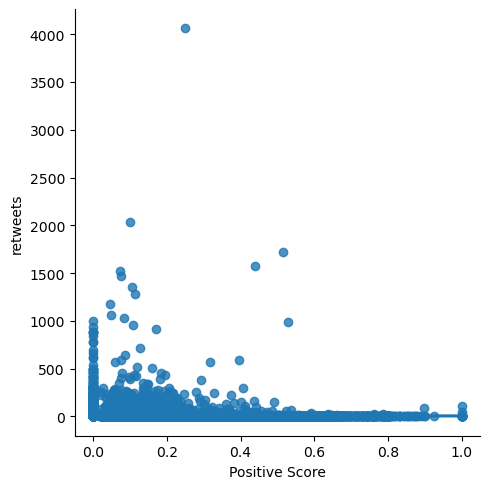

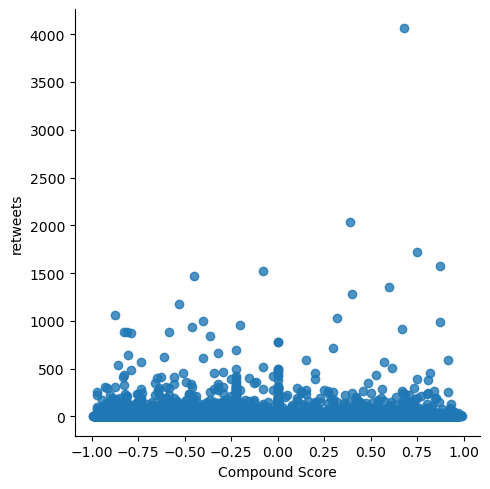

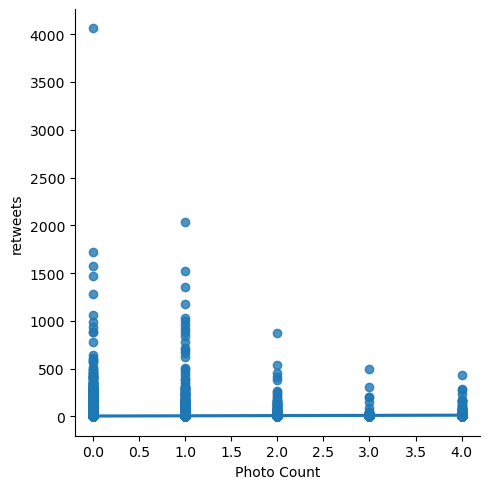

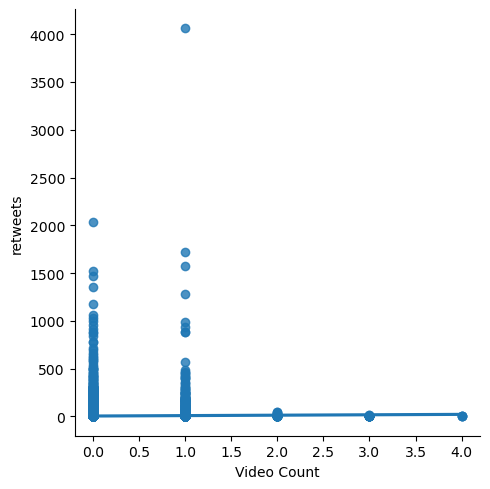

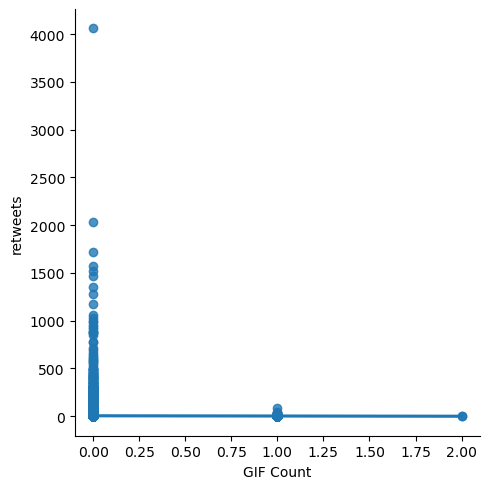

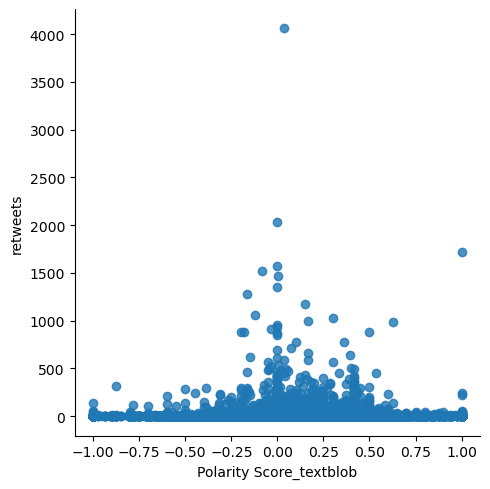

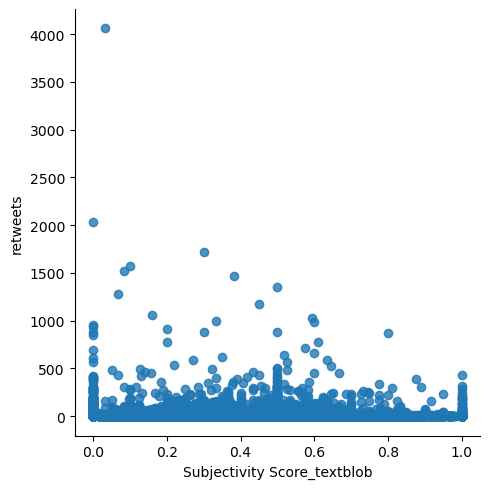

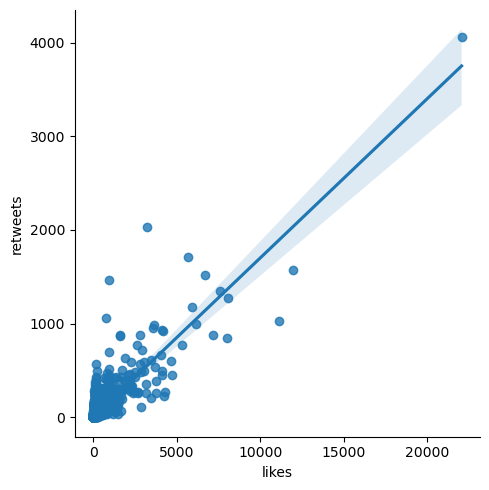

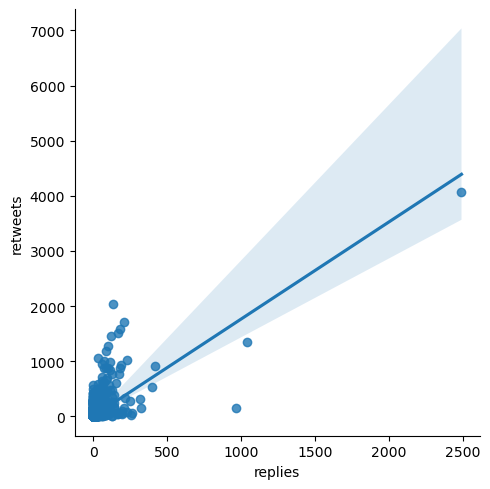

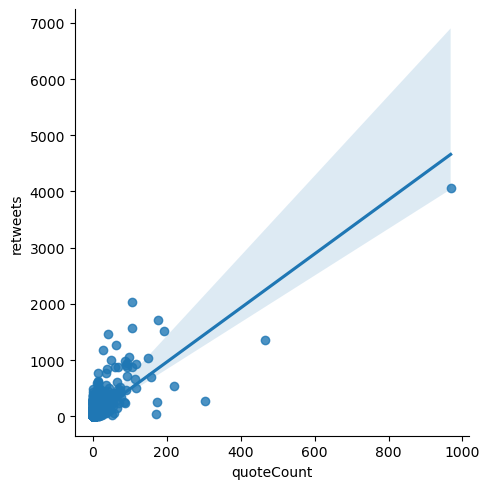

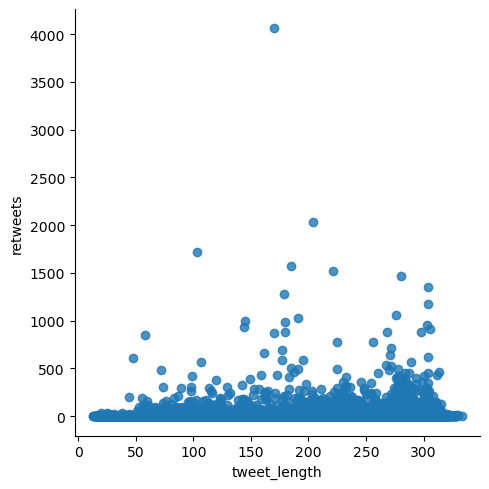

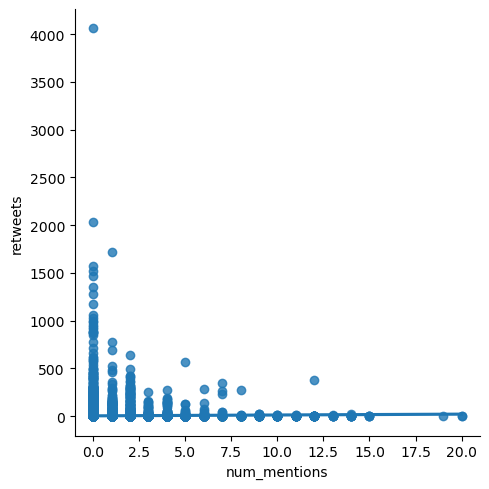

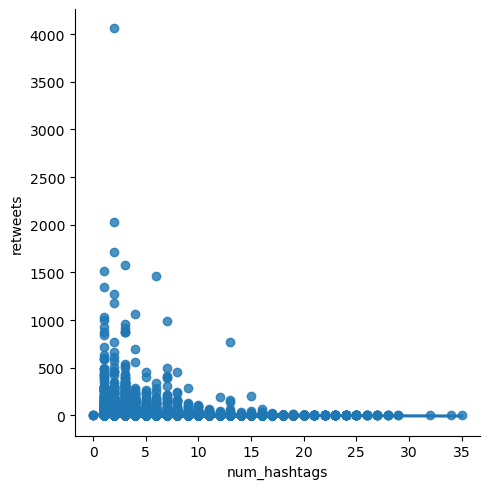

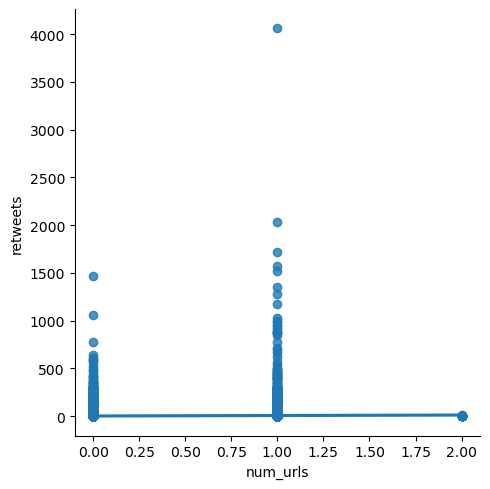

In [24]:
for col in numeric_cols:
    sns.lmplot(x=col, y='retweets', data=data)

In [22]:
import statsmodels.api as sm

# Define the dependent variable and the independent variables
X = data[numeric_cols]
y = data['retweets']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit a linear regression model using OLS
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           8.90e-24
Time:                        00:30:31   Log-Likelihood:            -2.8808e+05
No. Observations:               57862   AIC:                         5.762e+05
Df Residuals:                   57860   BIC:                         5.762e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   